### Introduction: 

- Goal: To develop a model and do Naïve Bayes Sentiment Analysis
- Dataset: We will be working with the polarity dataset  which is comprised of 1000 positive and 1000 negative movie reviews. Each movie review is in the form of free-form text captured from web site postings.
http://www.cs.cornell.edu/people/pabo/movie-review-data/
- Steps: 
1. Import the data 
2. Read the text file and transform the provided data into properly labeled count vectors within a Term-Document matrix
3. Present word count frequency distribution plots for both positive and negative reviews
4. Splitting training and test data and develop Naïve Bayes Classifer model 
5. Test the developed model
6. Conclusion

In [1]:
#importing necessary libraries
import pandas as pd
from os import listdir
from nltk.corpus import stopwords
import string
# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
import requests

### Data preparation and Frequency plots

In [2]:
# load doc into memory
def load_doc(filename):
 # open the file as read only
 file = open(filename, 'r')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text
 

In [16]:
def loadhtmldoc(url):
    response = requests.get(url)
    return response.text

In [21]:
github = "https://github.com/getfitwithapurv/datascience/blob/5f586ddb8cbb26d50f28e393bd10cfeea82dc354/neg"
doc= loadhtmldoc(github)

### For Negative Reviews

In [7]:
# specify directory to load
directory = '/Users/apurvwaghule/Desktop/Data Science /Week 10 /review_polarity/txt_sentoken/neg copy'
# walk through all files in the folder
for filename in listdir(directory):
 # skip files that do not have the right extension
 # create the full path of the file to open
    path = directory + '/' + filename
 # load document
    doc = load_doc(path)
    text = load_doc(path)
     # split into tokens by white space
    tokens = text.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
# Count Vectorizer
    vect = CountVectorizer()  
    vects = vect.fit_transform(tokens)

# Select the rows from the data set and create term document matrix
    td = pd.DataFrame(vects.todense())
    td.columns = vect.get_feature_names_out()
    term_document_matrix1 = td.T
    term_document_matrix1.columns = ['Doc '+str(i) for i in range(1,len(tokens)+1)]
    term_document_matrix1['total_count'] = term_document_matrix1.sum(axis=1)

In [8]:
# Adding new column to flag that review is negative with a constant value
term_document_matrix1["review_type"] = 0

In [9]:
term_document_matrix1 #sanity check

,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,Doc 10,...,Doc 362,Doc 363,Doc 364,Doc 365,Doc 366,Doc 367,Doc 368,Doc 369,total_count,review_type
across,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
act,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
actors,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
admit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
advanced,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
worth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
would,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
yeah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
year,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Top 30 words 
top30n = term_document_matrix1.sort_values(by ='total_count',ascending=False)[:30] 
print(top30n.drop(columns=['total_count']))

             Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
psychlo          0      0      0      0      0      0      0      0      0   
battlefield      1      0      0      0      0      1      0      0      0   
film             0      0      0      0      0      0      0      1      0   
travolta         0      0      0      0      0      0      0      0      0   
earth            0      0      0      0      0      0      1      0      0   
might            0      0      0      0      0      0      0      0      0   
one              0      0      0      0      0      0      0      0      0   
screen           0      0      0      0      0      0      0      0      0   
dont             0      0      0      0      0      0      0      0      0   
years            0      0      0      0      0      0      0      0      0   
something        0      0      0      0      0      0      0      0      0   
long             0      1      0      0      0      0      0    

<AxesSubplot:>

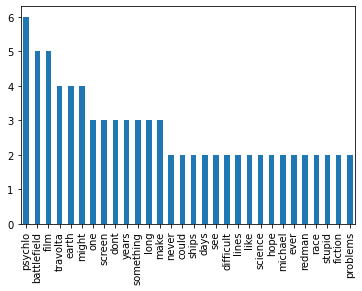

In [11]:
top30n['total_count'].plot.bar() #count/frequency plot for top 30 words in negative reviews 

### For Positive Reviews

In [29]:
# specify directory to load
directory = '/Users/apurvwaghule/Desktop/Data Science /Week 10 /review_polarity/txt_sentoken/pos copy'
# walk through all files in the folder
for filename in listdir(directory):
 # skip files that do not have the right extension
 # create the full path of the file to open
    path = directory + '/' + filename
 # load document
    doc = load_doc(path)
    text = load_doc(path)
     # split into tokens by white space
    tokens = text.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]

# Count Vectorizer
    vect = CountVectorizer()  
    vects = vect.fit_transform(tokens)

# Select the rows from the data set and create term document matrix
    td = pd.DataFrame(vects.todense())
    td.columns = vect.get_feature_names_out()
    term_document_matrix2 = td.T
    term_document_matrix2.columns = ['Doc '+str(i) for i in range(1,len(tokens)+1)]
    term_document_matrix2['total_count'] = term_document_matrix2.sum(axis=1)

In [30]:
# Adding new column to flag that review is postive with a constant value
term_document_matrix2["review_type"] = 1

In [31]:
term_document_matrix2 #sanity check

,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,Doc 10,...,Doc 337,Doc 338,Doc 339,Doc 340,Doc 341,Doc 342,Doc 343,Doc 344,total_count,review_type
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
accurate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
acting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
advanced,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
affair,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
worlds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
year,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [32]:
# Top 30 words 
top30p = term_document_matrix2.sort_values(by ='total_count',ascending=False)[:30] 
print(top30p.drop(columns=['total_count']))

           Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
computer       0      0      0      0      0      0      0      0      0   
kurosawa       0      0      0      0      0      0      0      0      0   
seem           0      0      0      0      0      0      0      0      0   
somehow        0      0      0      0      0      0      0      0      0   
one            0      0      0      0      0      0      0      0      1   
world          0      0      0      0      0      0      0      0      0   
film           0      0      0      0      0      0      0      0      0   
people         0      0      0      0      0      0      0      0      0   
horror         0      0      0      0      0      0      0      0      0   
films          0      0      0      0      0      0      0      0      0   
virus          0      0      0      0      0      0      0      0      0   
enough         0      0      0      0      0      0      0      0      0   
images      

<AxesSubplot:>

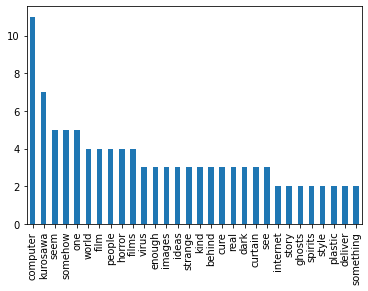

In [33]:
top30p['total_count'].plot.bar() #count/frequency plot for top 30 words in positive reviews 

In [37]:
#merging both negative and positive term matrix document dataframes
df3 = pd.merge(term_document_matrix1, term_document_matrix2, how="outer")
df3

,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,Doc 10,...,Doc 362,Doc 363,Doc 364,Doc 365,Doc 366,Doc 367,Doc 368,Doc 369,total_count,review_type
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1
543,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
544,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
545,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [39]:
#removing the total_ count column as it is not needed
del df3["total_count"]

In [47]:
df3 = df3.fillna(0) #filling null values with 0 

In [48]:
df3 #sanity check

,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,Doc 10,...,Doc 361,Doc 362,Doc 363,Doc 364,Doc 365,Doc 366,Doc 367,Doc 368,Doc 369,review_type
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
543,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
544,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
545,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Naïve Bayes Model Training & Testing

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import metrics

In [50]:
X = df3.drop(['review_type'],axis=1)
y = df3['review_type']

In [53]:
# Now split the data into training and testing subsets. 
# We'll set aside 25% of the data for testing purposes; 
# Rnadom state is kept to 12 to have the ability to reproduce the exact same training and testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [55]:
model = MultinomialNB().fit(X_train, y_train) #model training

In [56]:
y_pred = model.predict(X_test) #predicting model

In [57]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.16363636363636364
F1 score: 0.140625


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.31      0.28        86
           1       0.00      0.00      0.00        79

    accuracy                           0.16       165
   macro avg       0.13      0.16      0.14       165
weighted avg       0.13      0.16      0.15       165



### Conclusion: 

Successfully completed the steps mentioned in the introduction of this assignment. We have found top 30 positive and negative words in our datase. Also the Accuracy and F1 score for Naïve Bayes Model can be seen from the results given above

### References: 
- Prof. Topor's Jupyter Notebook
- https://okan.cloud/posts/2021-04-08-text-vectorization-using-python-term-document-matrix/
- https://practicaldatascience.co.uk/machine-learning/how-to-create-a-naive-bayes-text-classification-model-using-scikit-learn
- https://github.com/mattharrison/ml_pocket_reference/blob/master/ch10.ipynb
